<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/RidgeRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

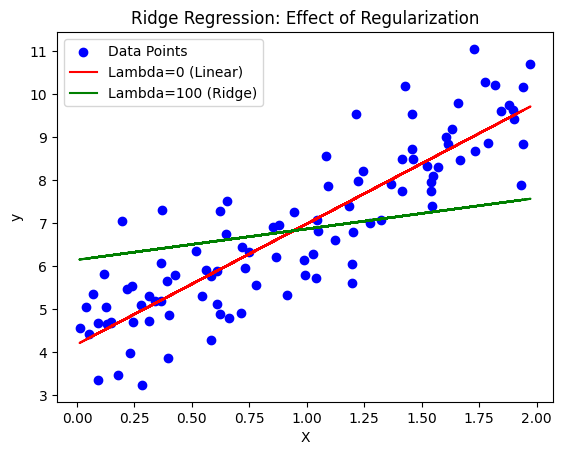

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class RidgeRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, l2_penalty=1):
        self.lr = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty # This is lambda (λ)

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n) # Weights
        self.b = 0                # Bias/Intercept

        # Gradient Descent
        for _ in range(self.iterations):
            y_pred = X.dot(self.W) + self.b

            # Calculate gradients (including L2 penalty for weights)
            dW = (- (2 * X.T.dot(y - y_pred)) + (2 * self.l2_penalty * self.W)) / self.m
            db = - 2 * np.sum(y - y_pred) / self.m

            # Update weights and bias
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return X.dot(self.W) + self.b


# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
# Fix: Ensure y is a 1-dimensional array by flattening all terms
y = (4 + 3 * X.flatten()) + np.random.randn(100,).flatten()

# Train models with different penalties
model_low = RidgeRegression(l2_penalty=0) # Acts as Linear Regression
model_low.fit(X, y)

model_high = RidgeRegression(l2_penalty=100) # High regularization
model_high.fit(X, y)

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model_low.predict(X), color='red', label='Lambda=0 (Linear)')
plt.plot(X, model_high.predict(X), color='green', label='Lambda=100 (Ridge)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression: Effect of Regularization')
plt.legend()
plt.show()